In [ ]:
import pandas as pd
from glob import glob

## Merge Multiple Workbooks/Files of Multiple Sheets

In [ ]:
df = pd.DataFrame()
# the glob module is used to retrieve files/pathnames matching a specified pattern
dir_filenames = sorted(glob('./*.xlsx')) # all excel files from current directory
for dir_file in dir_filenames:
    dict_xlsx = pd.read_excel(dir_file, sheet_name=None) 
    workbook = pd.concat([v_df.assign(Sheet = k) for k,v_df in dict_xlsx.items()], ignore_index=True)
    df = pd.concat([df,workbook],ignore_index=True)
print(f'shape of merged files:{df.shape}')

## Check Null Values and %Nulls

In [ ]:
count_null_series = df.isnull().sum() # returns series
count_null_df = pd.DataFrame(data=count_null_series, columns=['Num_Nulls'])
# what % of the null values take for that column
pct_null_df = pd.DataFrame(data=count_null_series/len(df), columns=['Pct_Nulls'])
null_stats = pd.concat([count_null_df, pct_null_df],axis=1)
# format the % to remain 2 decimals
df['Pct_Nulls'] = df['Pct_Nulls'].apply(lambda x: '{:,.2%}'.format(x))
null_stats

### Handling Nulls

In [ ]:
# time-series data
df[col_name].fillna(method="ffill",inplace=True)
# fill na on multiple columns with different constant. col1,2,3 are column names
df.fillna(value={col1:50, col2:67, col3:100}, inplace=True)
# fill na with column mean
df.where(pd.notna(df), df.mean(), axis="columns", inplace=True)
# drop rows when any column is null
df.dropna(subset=subset_list, inplace=True)
# drop columns when %Null reaches a threshold
df.dropna(thresh=len(df)/2, axis=1, inplace=True)

## Drop Columns

In [ ]:
df.drop(df.columns[start_ind:stop_ind],axis=1,inplace=True)

## Clean Column Names

In [ ]:
df.rename(columns=change_dict, inplace=True)
# remove special characters from column name
df.columns = df.columns.str.replace('[&,#,@,(,)]', '')
# remove leading/trailing space and add _ to in-between spaces
df.columns = df.columns.str.strip().str.replace(' ','_')

## Change Data Types

In [ ]:
for c in ['OrderID','ItemID','Class']:
    df[c] = df[c].astype('str')

## Find & Drop Duplicates

In [ ]:
len_df = len(df)
len_drop = len(df.drop_duplicates(subset = subset_list))
len_diff = len_df-len_drop
print(f'difference of length:{len_diff}')
if len_diff>0:
    dups = df[df.duplicated(keep=False)].sort_values(by=sort_list) 
    dups

In [ ]:
# i.e. keep the last value of the duplicates
df_drop = df.drop_duplicates(subset=subset_list,keep='last')

## Clean Date and Time

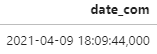

In [39]:
# split by comma, retrieve the first column
df['date_com'] = df['date_com'].str.split(',', expand=True)[0] # depends on the data
df['date_com'] = pd.to_datetime(df['date_com'], format='%Y-%m-%d %H:%M:%S')

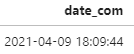

### Split Date and Time

In [ ]:
df['Date'] = df['date_com'].dt.date
dt_lst = df['date_com'].str.split(' ', n=1, expand = True)
df['Time'] = dt_lst[1]
# extract hour from Time
time_lst = df['date_com'].str.split(':', n=1, expand = True)
df['Hour'] = time_lst[0] #str
df['Hour'] = df['Hour'].astype(int)